In [41]:
# Step 1: Import Libraries
## First, import the necessary libraries.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
import pickle
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [42]:
# Step 2: Load the Data
## Load dataset and select the columns needed for the analysis.
### Load your data (adjust the file path as needed)
data = pd.read_excel('maintenance_cleaned_extended.xlsx')

# Pass - 1

In [5]:
### Select columns relevant to predicting 'cost' and drop any rows with missing values
columns_needed = ['service_duration', 'KMs Diff', 'cost']
data_for_regression = data[columns_needed].dropna()

#Step 3: Define Features (X) and Target (y)
##Separate the features you’ll use to predict costs from the target variable.
### Define X (features) and y (target)
X = data_for_regression[['service_duration', 'KMs Diff']]
y = data_for_regression['cost']

# Step 4: Split the Data
## Split the data into training and testing sets. This allows to evaluate model performance on unseen data.
### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Linear Regression Model
## Now, train the linear regression model using the training data.
### Initialize and train the Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Step 6: Make Predictions and Evaluate the Model
## After training, predict the cost for the test set and evaluate the model’s performance using Mean Squared Error (MSE) and R² score.
### Predict on the test set
y_pred = reg_model.predict(X_test)

### Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

### Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print("Model Coefficients:", reg_model.coef_)
print("Intercept:", reg_model.intercept_)

#### Explanation of Results
#### Mean Squared Error (MSE): A lower MSE indicates that the model’s predictions are close to the actual values.
#### R² Score: Measures how well the model explains the variability in the target variable (cost). An R² score closer to 1 indicates better performance.
#### Coefficients and Intercept: These values show the model’s estimated impact of each feature on the cost.
#### This code will give you a basic regression model that predicts maintenance costs based on service duration and the KMs Diff. Let me know if you have any questions about these steps!

Mean Squared Error (MSE): 10843.317998646802
R² Score: 0.20434878289600744
Model Coefficients: [27.79054151  1.05603508]
Intercept: 47.06122494270196


# Pass - 2

In [6]:
### Select columns relevant to predicting 'cost' and drop any rows with missing values
columns_needed = ['service_duration', 'KMs Diff', 'location', 'damage type', 'cost_category', 'cost']
data_for_regression = data[columns_needed].dropna()

# Step 3: Define Features (X) and Target (y)¶
## Separate the features you’ll use to predict costs from the target variable.
### Define X (features) and y (target)
X = data_for_regression[['service_duration', 'KMs Diff', 'location', 'damage type', 'cost_category']]
y = data_for_regression['cost']

# One-Hot Encoding:
## Converts each category into a separate binary (0 or 1) column. This is generally effective for categorical data without order.
### Convert categorical columns to one-hot encoding
data_encoded = pd.get_dummies(data_for_regression, columns=['location', 'damage type', 'cost_category'])

### Define X and y with the encoded data
X = data_encoded.drop('cost', axis=1)
y = data_encoded['cost']

# Step 4: Split the Data
## Split the data into training and testing sets. This allows to evaluate model performance on unseen data.
### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Linear Regression Model
## Now, train the linear regression model using the training data.
### Initialize and train the Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Step 6: Make Predictions and Evaluate the Model¶
## After training, predict the cost for the test set and evaluate the model’s performance using Mean Squared Error (MSE) and R² score.
### Predict on the test set
y_pred = reg_model.predict(X_test)

### Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

### Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print("Model Coefficients:", reg_model.coef_)
print("Intercept:", reg_model.intercept_)

#### Explanation of Results
#### Mean Squared Error (MSE): A lower MSE indicates that the model’s predictions are close to the actual values.
#### R² Score: Measures how well the model explains the variability in the target variable (cost). An R² score closer to 1 indicates better performance.
#### Coefficients and Intercept: These values show the model’s estimated impact of each feature on the cost.
#### This code will give you a basic regression model that predicts maintenance costs based on service duration and the KMs Diff. Let me know if you have any questions about these steps!

Mean Squared Error (MSE): 578.5310369157792
R² Score: 0.9575490708921458
Model Coefficients: [-1.07100211e+00 -8.62551132e-02 -4.01684698e+11 -4.01684698e+11
 -4.01684698e+11 -4.01684698e+11 -4.01684698e+11 -4.01684698e+11
 -4.01684698e+11 -4.01684698e+11 -4.01684698e+11 -4.01684698e+11
 -4.01684698e+11 -4.01684698e+11 -4.01684698e+11 -4.01684698e+11
 -4.01684698e+11 -4.01684698e+11 -4.01684698e+11 -4.01684698e+11
 -4.01684698e+11 -4.01684698e+11 -4.01684698e+11 -4.01684698e+11
 -4.01684698e+11 -4.01684698e+11 -4.01684698e+11 -4.01684698e+11
 -4.01684698e+11 -4.01684698e+11 -4.01684698e+11 -4.01684698e+11
 -4.01684698e+11 -4.01684698e+11 -2.38454075e+12 -2.38454075e+12
 -2.38454075e+12 -2.38454075e+12 -2.38454075e+12 -2.38454075e+12
 -2.38454075e+12 -5.67916576e+10 -5.67916575e+10 -5.67916575e+10
 -5.67916574e+10 -5.67916573e+10 -5.67916573e+10 -5.67916571e+10
 -5.67916571e+10 -5.67916570e+10 -5.67916569e+10 -5.67916568e+10
 -5.67916567e+10 -5.67916565e+10 -5.67916561e+10 -5.67916552e+

# Pass-3

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Scale numerical features
scaler = StandardScaler()
X[['service_duration', 'KMs Diff']] = scaler.fit_transform(X[['service_duration', 'KMs Diff']])

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply Ridge Regression
reg_model = Ridge(alpha=1.0)
reg_model.fit(X_train, y_train)

# Step 4: Predictions and Evaluation
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print("Model Coefficients:", reg_model.coef_)
print("Intercept:", reg_model.intercept_)


Mean Squared Error (MSE): 808.1709095686558
R² Score: 0.9406987632469519
Model Coefficients: [ 2.07305536e+01 -4.86733031e-02 -2.29344574e+01 -5.97946885e+00
 -1.32962231e+01 -8.60372531e+00 -3.17368949e+01 -2.86881026e+01
 -1.14999593e+01 -5.39441742e+00 -1.05580781e+01  2.06098398e+00
  1.19789750e+02 -1.14991501e+01 -2.31462982e+00 -1.59357262e+01
 -1.44025673e+01 -7.86760515e+00 -1.39978892e+01 -5.56302143e+00
 -7.20915211e+00 -1.34674183e+01 -4.29994181e+00 -1.50361544e+01
 -8.70236539e+00  1.94280073e+01 -1.26267549e+01 -1.21046570e+01
 -1.65835465e+01 -1.02102875e+01  1.81972357e+02 -6.89276118e+00
 -3.30701153e+00 -2.53913155e+00  9.45516693e+00 -3.75231782e-02
  6.08562942e+00 -1.58461738e+01  1.63572770e+00  4.12845793e+00
 -5.42128500e+00 -4.86125308e+02 -4.42476457e+02 -4.03177335e+02
 -3.59760567e+02 -2.76027043e+02 -1.90302687e+02 -7.64421035e+01
 -3.45422206e+01  8.50564544e+01  1.04899671e+02  1.16669818e+02
  1.48340124e+02  4.58722163e+02  3.73698078e+02  9.81467413e+

# Pass-4

In [8]:
### Select columns relevant to predicting 'cost' and drop any rows with missing values
columns_needed = ['service_duration', 'KMs Diff', 'location', 'damage type', 'cost_category', 'cost']
data_for_regression = data[columns_needed].dropna()

# Step 3: Define Features (X) and Target (y)¶
## Separate the features you’ll use to predict costs from the target variable.
### Define X (features) and y (target)
X = data_for_regression[['service_duration', 'KMs Diff', 'location', 'damage type', 'cost_category']]
y = data_for_regression['cost']

# One-Hot Encoding:
## Converts each category into a separate binary (0 or 1) column. This is generally effective for categorical data without order.
### Convert categorical columns to one-hot encoding
data_encoded = pd.get_dummies(data_for_regression, columns=['location', 'damage type', 'cost_category'])

### Define X and y with the encoded data
X = data_encoded.drop('cost', axis=1)
y = data_encoded['cost']

# Step 4: Split the Data
## Split the data into training and testing sets. This allows to evaluate model performance on unseen data.
### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train and Tune Lasso Regression Model
## Now, instead of a single model, we’ll try different alpha values for Lasso and evaluate each.

from sklearn.linear_model import Lasso

### Define a range of alpha values for tuning
alphas = [0.1, 0.5, 1.0, 5.0, 10.0]
results = {}

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    # Step 6: Make Predictions and Evaluate the Model
    y_pred = lasso_model.predict(X_test)
    
    ### Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    ### Store the results for each alpha
    results[alpha] = (mse, r2, lasso_model.coef_)
    
    ### Print the results for each alpha
    print(f"\nAlpha: {alpha}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}")
    print("Non-zero Coefficients:", sum(lasso_model.coef_ != 0))


#### Explanation of Results
#### Mean Squared Error (MSE): A lower MSE indicates that the model’s predictions are close to the actual values.
#### R² Score: Measures how well the model explains the variability in the target variable (cost). An R² score closer to 1 indicates better performance.
#### Coefficients and Intercept: These values show the model’s estimated impact of each feature on the cost.
#### This code will give you a basic regression model that predicts maintenance costs based on service duration and the KMs Diff. Let me know if you have any questions about these steps!




Alpha: 0.1
Mean Squared Error (MSE): 259.82328722397466
R² Score: 0.9809349209589246
Non-zero Coefficients: 22

Alpha: 0.5
Mean Squared Error (MSE): 740.4329215077421
R² Score: 0.945669180295642
Non-zero Coefficients: 15

Alpha: 1.0
Mean Squared Error (MSE): 1142.9866858662692
R² Score: 0.9161309529189638
Non-zero Coefficients: 11

Alpha: 5.0
Mean Squared Error (MSE): 4686.403080998204
R² Score: 0.656125337677872
Non-zero Coefficients: 5

Alpha: 10.0
Mean Squared Error (MSE): 6877.007532050711
R² Score: 0.4953851382397606
Non-zero Coefficients: 4


# Final Pass

In [9]:
### Select columns relevant to predicting 'cost' and drop any rows with missing values
columns_needed = ['service_duration', 'KMs Diff', 'location', 'damage type', 'cost_category', 'cost']
data_for_regression = data[columns_needed].dropna()

# Step 3: Define Features (X) and Target (y)¶
## Separate the features you’ll use to predict costs from the target variable.
### Define X (features) and y (target)
X = data_for_regression[['service_duration', 'KMs Diff', 'location', 'damage type', 'cost_category']]
y = data_for_regression['cost']

# One-Hot Encoding:
## Converts each category into a separate binary (0 or 1) column. This is generally effective for categorical data without order.
### Convert categorical columns to one-hot encoding
data_encoded = pd.get_dummies(data_for_regression, columns=['location', 'damage type', 'cost_category'])

### Define X and y with the encoded data
X = data_encoded.drop('cost', axis=1)
y = data_encoded['cost']

# Step 4: Split the Data
## Split the data into training and testing sets. This allows to evaluate model performance on unseen data.
### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train and Tune Lasso Regression Model
## Now, instead of a single model, we’ll try different alpha values for Lasso and evaluate each.

from sklearn.linear_model import Lasso

# Train Lasso model with best alpha value (alpha = 0.1)
best_alpha = 0.1
final_model = Lasso(alpha=best_alpha)
final_model.fit(X_train, y_train)


# Step 6: Predict on the test set with final model
y_pred = final_model.predict(X_test)

### Calculate final evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

### Print the final results
print(f"Final Model Results with Alpha = {best_alpha}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print("Non-zero Coefficients:", sum(final_model.coef_ != 0))
print("Model Coefficients:", final_model.coef_)
print("Intercept:", final_model.intercept_)

#### Explanation of Results
#### Mean Squared Error (MSE): A lower MSE indicates that the model’s predictions are close to the actual values.
#### R² Score: Measures how well the model explains the variability in the target variable (cost). An R² score closer to 1 indicates better performance.
#### Coefficients and Intercept: These values show the model’s estimated impact of each feature on the cost.
#### This code will give you a basic regression model that predicts maintenance costs based on service duration and the KMs Diff. Let me know if you have any questions about these steps!



Final Model Results with Alpha = 0.1
Mean Squared Error (MSE): 259.82328722397466
R² Score: 0.9809349209589246
Non-zero Coefficients: 22
Model Coefficients: [ 2.28138927e-01 -7.11463903e-02 -8.57956095e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  4.56006888e+01  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  7.42271384e-01  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.49309026e+01 -0.00000000e+00
  0.00000000e+00 -1.08325629e+01 -0.00000000e+00  0.00000000e+00
 -6.91470632e+00 -4.93700907e+02 -4.47948793e+02 -4.09829750e+02
 -3.62901653e+02 -2.69316233e+02 -1.87140703e+02 -7.48199581e+01
  0.00000000e+00  8.82337820e+01  1.40460185e+02  1.49537360e+0

Your step-by-step code seems generally well-organized, and each step flows logically to build up to the final predictive model. I'll break down each pass to highlight the purpose, progression, and value it adds.

Explanation by Passes
Pass 1: Basic Linear Regression
In this initial pass, you are establishing a simple linear regression model.

Steps & Purpose:

Data Preparation: Load necessary columns and handle missing values.
Define X and y: Use basic features (service_duration and KMs Diff) to predict cost.
Train/Test Split: Split data for training and testing.
Train Model: Basic linear regression without regularization.
Evaluate: Calculate Mean Squared Error (MSE) and R² score.
Why Move to the Next Pass?

While this model gives initial insights, it does not capture categorical factors (like location, damage type, and cost_category) that might be significant predictors of cost. Without these, the model is limited in scope.
Pass 2: Linear Regression with Categorical Encoding
This pass incorporates additional categorical features.

Steps & Purpose:

Include Categorical Features: location, damage type, and cost_category are added to enhance prediction accuracy.
One-Hot Encoding: This encoding is crucial as linear regression cannot directly process categorical data.
Define X and y: Use the new features after encoding.
Train and Evaluate: Model is retrained, and the results are re-evaluated.
Why Move to the Next Pass?

This pass expands the model but does not address issues like feature scaling, which can affect model performance due to differences in feature magnitudes. Also, categorical features increase complexity, which may lead to overfitting.
Pass 3: Ridge Regression with Scaling
This pass uses Ridge Regression, a regularization method to reduce overfitting and stabilize the model.

Steps & Purpose:

Feature Scaling: Standardization improves model convergence and handles the impact of features with different scales.
Ridge Regression: Adds a penalty term to the model, which helps handle multicollinearity and improves generalization.
Train and Evaluate: Train and evaluate the Ridge model to see if performance improves with regularization.
Why Move to the Next Pass?

While Ridge regression reduces overfitting, it doesn’t handle feature selection explicitly. Some irrelevant features (especially among the encoded categorical ones) might still add noise. Moving to Lasso regression, which performs feature selection, is a logical next step.
Pass 4: Hyperparameter Tuning with Lasso Regression
This pass introduces Lasso regression to add feature selection and uses multiple alpha values to find an optimal fit.

Steps & Purpose:

Lasso Regression: Allows for automatic feature selection by shrinking some coefficients to zero.
Hyperparameter Tuning: By evaluating different alpha values, you identify the model that best balances error reduction and sparsity.
Train and Evaluate: For each alpha, the model is evaluated, and metrics are stored.
Why Move to the Final Pass?

After identifying the optimal alpha, you can retrain the model with the best setting for final testing and reporting.
Final Pass: Final Model with Best Alpha
Using the best alpha from the previous pass, this is the final model training and evaluation.

Steps & Purpose:

Train Final Model: With the best-performing alpha from the previous tuning.
Final Evaluation: MSE, R², non-zero coefficients, coefficients, and intercept are reported as the final model metrics.
Summary
Each pass builds on the previous one to refine the model. The flow is logical:

Pass 1 establishes a baseline.
Pass 2 incorporates categorical data to enrich predictive power.
Pass 3 addresses scaling and overfitting with Ridge regression.
Pass 4 tests and fine-tunes with Lasso to identify the optimal feature set.
Final Pass solidifies the best model with selected hyperparameters.
This layered approach ensures your final model is both well-generalized and interpretable, maximizing prediction accuracy without unnecessary complexity. Let me know if you'd like a deeper dive into any specific part or further optimization suggestions!

# Final model with saving encoding

In [26]:
### Select columns relevant to predicting 'cost' and drop any rows with missing values
columns_needed = ['service_duration', 'KMs Diff', 'location', 'damage type', 'cost_category', 'cost']
data_for_regression = data[columns_needed].dropna()

# Step 3: Define Features (X) and Target (y)¶
## Separate the features you’ll use to predict costs from the target variable.
### Define X (features) and y (target)
X = data_for_regression[['service_duration', 'KMs Diff', 'location', 'damage type', 'cost_category']]
y = data_for_regression['cost']

# One-Hot Encoding:
## Converts each category into a separate binary (0 or 1) column. This is generally effective for categorical data without order.
### Convert categorical columns to one-hot encoding
data_encoded = pd.get_dummies(data_for_regression, columns=['location', 'damage type', 'cost_category'])
print('data_encoded',data_encoded.shape)
# Save the one-hot encoded column names
one_hot_columns = data_encoded.columns.tolist()
print('one_hot_columns',len(one_hot_columns))
print('one_hot_columns',one_hot_columns)
with open('one_hot_columns.pkl', 'wb') as file:
    pickle.dump(one_hot_columns, file)

### Define X and y with the encoded data
X = data_encoded.drop('cost', axis=1)
print('X= ',X.shape)
y = data_encoded['cost']

# Step 4: Split the Data
## Split the data into training and testing sets. This allows to evaluate model performance on unseen data.
### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train',X_train.shape)

# Step 5: Train and Tune Lasso Regression Model
## Now, instead of a single model, we’ll try different alpha values for Lasso and evaluate each.


# Train Lasso model with best alpha value (alpha = 0.1)
best_alpha = 0.1
final_model = Lasso(alpha=best_alpha)
final_model.fit(X_train, y_train)
print('X_train =',X_train)

# Save the model
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

# Step 6: Predict on the test set with final model
y_pred = final_model.predict(X_test)

### Calculate final evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

### Print the final results
print(f"Final Model Results with Alpha = {best_alpha}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print("Non-zero Coefficients:", sum(final_model.coef_ != 0))
print("Model Coefficients:", final_model.coef_)
print("Intercept:", final_model.intercept_)

#### Explanation of Results
#### Mean Squared Error (MSE): A lower MSE indicates that the model’s predictions are close to the actual values.
#### R² Score: Measures how well the model explains the variability in the target variable (cost). An R² score closer to 1 indicates better performance.
#### Coefficients and Intercept: These values show the model’s estimated impact of each feature on the cost.
#### This code will give you a basic regression model that predicts maintenance costs based on service duration and the KMs Diff. Let me know if you have any questions about these steps!


data_encoded (1499, 57)
one_hot_columns 57
one_hot_columns ['service_duration', 'KMs Diff', 'cost', 'location_4 جيد', 'location_ابو خضر', 'location_ابو نعمه', 'location_الصالحي', 'location_العبدلي', 'location_العمله', 'location_الغزاوي', 'location_الغزاوي+معاذ', 'location_القسطل', 'location_الماسيه زجاج سيارات', 'location_المحطه', 'location_المركزية', 'location_المركزيه+زكي', 'location_المسة الذهبية', 'location_المفرق', 'location_المكتب', 'location_اليادودة', 'location_امجد العطاري', 'location_تم التركيب ف صويلح', 'location_جلاسكو', 'location_ريمان', 'location_زكي البهو', 'location_شارلي', 'location_فهر', 'location_في الطفيله', 'location_قسطل', 'location_قفيشة', 'location_كيا', 'location_محطة الرشاد', 'location_مشربش', 'location_معاذ عليان', 'location_هانكونك', 'damage type_اصلاح بودي', 'damage type_اصلاح زجاج', 'damage type_اصلاح فرش', 'damage type_اصلاح كهرباء', 'damage type_اصلاح كوشوك', 'damage type_اصلاح مكانيك ', 'damage type_غيار زيت', 'cost_category_0001:0050', 'cost_category_0

# New Model

In [28]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

# Load the dataset
df = pd.read_excel('maintenance_cleaned_extended.xlsx')

# Filter necessary columns based on the suggested features
df = df[['damage type', 'KMs IN', 'service_duration', 'location', 'cost']]

# Define the feature matrix X and target vector y
X = df[['damage type', 'KMs IN', 'service_duration', 'location']]
y = df['cost']

# Create a preprocessor for one-hot encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['damage type', 'location'])
    ],
    remainder='passthrough'  # Leave `KMs IN` and `service_duration` as-is
)

# Define a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))  # Set alpha based on previous tuning or adjust as necessary
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Test the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


### Calculate final evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

### Print the final results
print(f"Final Model Results with Alpha = {best_alpha}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print("Non-zero Coefficients:", sum(final_model.coef_ != 0))
print("Model Coefficients:", final_model.coef_)
print("Intercept:", final_model.intercept_)


# Save the trained model
with open('final_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

# Save the one-hot encoded column names for prediction alignment
one_hot_columns = pipeline.named_steps['preprocessor'].get_feature_names_out()
with open('one_hot_columns.pkl', 'wb') as file:
    pickle.dump(one_hot_columns, file)


Mean Squared Error: 17670.8736999076
Final Model Results with Alpha = 0.1
Mean Squared Error (MSE): 17670.8736999076
R² Score: -0.2966374469859705
Non-zero Coefficients: 22
Model Coefficients: [ 2.28138927e-01 -7.11463903e-02 -8.57956095e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  4.56006888e+01  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  7.42271384e-01  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.49309026e+01 -0.00000000e+00
  0.00000000e+00 -1.08325629e+01 -0.00000000e+00  0.00000000e+00
 -6.91470632e+00 -4.93700907e+02 -4.47948793e+02 -4.09829750e+02
 -3.62901653e+02 -2.69316233e+02 -1.87140703e+02 -7.48199581e+01
  0.00000000e+00  8.8233782

In [ ]:
# another pass

f:\program files (x86)\python37_64\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "f:\program files (x86)\python37_64\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "f:\program files (x86)\python37_64\lib\site-packages\sklearn\metrics\_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "f:\program files (x86)\python37_64\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "f:\program files (x86)\python37_64\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "f:\program files (x86)\python37_64\lib\site-packages\sklearn\utils\metaestimators.py", line 113

Final Model Results with Alpha = 0.001
Mean Squared Error (MSE): 20617.04085941275
Mean Absolute Error (MAE): 69.3905760589489
R² Score: -0.5128186460013111
Non-zero Coefficients: 39
Model Coefficients: [-9.63118735e+01 -1.33434792e+02 -1.56778754e+02 -4.21772864e+00
 -1.02153894e+02 -1.49420007e+02  1.44924766e+02 -3.27668388e-01
  1.16398935e+01 -5.87820990e+01 -9.92533273e+01  8.10086743e+00
  1.44577287e+01 -7.15214489e+00  1.45243011e+02  1.00484883e+03
 -1.51435237e+00  1.65032572e+01  4.42027641e+01  5.77004468e+01
  5.67117753e+00 -3.55938570e+01  4.12806697e+01 -6.75637649e+00
 -3.34258224e+01 -1.80818928e+01 -4.40166857e+01  1.85316128e+01
  2.30181202e+02  2.31481953e+01  1.47846909e+00 -7.30567639e+01
  4.12962798e+01  5.91380625e+02 -6.99860606e-01  7.47264801e+01
  1.95929279e+01  5.71214118e-05  2.24388946e+01]
Intercept: 151.22587474361356


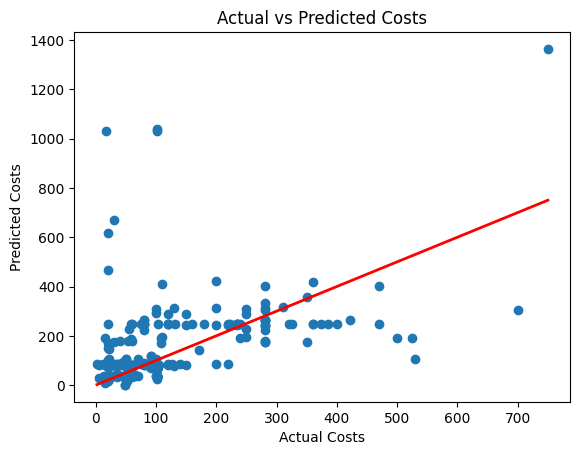

In [30]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('maintenance_cleaned_extended.xlsx')

# Filter necessary columns based on the suggested features
df = df[['damage type', 'KMs IN', 'service_duration', 'location', 'cost']]

# Define the feature matrix X and target vector y
X = df[['damage type', 'KMs IN', 'service_duration', 'location']]
y = df['cost']

# Create a preprocessor for one-hot encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['damage type', 'location'])
    ],
    remainder='passthrough'  # Leave `KMs IN` and `service_duration` as-is
)

# Define a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))  # Initial alpha value
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {'model__alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best pipeline from grid search
best_pipeline = grid_search.best_estimator_
best_alpha = grid_search.best_params_['model__alpha']

# Test the model
y_pred = best_pipeline.predict(X_test)

# Calculate final evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the final results
print(f"Final Model Results with Alpha = {best_alpha}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Get coefficients and intercept
final_model = best_pipeline.named_steps['model']
print("Non-zero Coefficients:", sum(final_model.coef_ != 0))
print("Model Coefficients:", final_model.coef_)
print("Intercept:", final_model.intercept_)

# Visualization of predictions vs actual values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # y=x line
plt.xlabel('Actual Costs')
plt.ylabel('Predicted Costs')
plt.title('Actual vs Predicted Costs')
plt.show()

# Save the trained model
with open('final_model.pkl', 'wb') as file:
    pickle.dump(best_pipeline, file)

# Save the one-hot encoded column names for prediction alignment
one_hot_columns = best_pipeline.named_steps['preprocessor'].get_feature_names_out()
with open('one_hot_columns.pkl', 'wb') as file:
    pickle.dump(one_hot_columns, file)


Unique damage types: ['اصلاح بودي' 'اصلاح مكانيك' 'غيار زيت' 'اصلاح كوشوك' 'اصلاح زجاج'
 'اصلاح كهرباء' 'اصلاح فرش']
Unique locations: ['المركزية' 'ابو خضر' 'هانكونك' 'الغزاوي' 'اليادودة' 'المكتب' 'القسطل'
 '4 جيد' 'مشربش' 'ابو نعمه' 'معاذ عليان' 'قسطل' 'امجد العطاري' 'جلاسكو'
 'محطة الرشاد' 'العبدلي' 'الماسيه زجاج سيارات' 'قفيشة' 'المسة الذهبية'
 'فهر' 'شارلي' 'العمله' 'الصالحي' 'زكي البهو' 'الغزاوي+معاذ' 'ريمان'
 'في الطفيله' 'تم التركيب ف صويلح' 'المفرق' 'المحطه' 'المركزيه+زكي' 'كيا']
Training unique damage types: ['اصلاح مكانيك' 'اصلاح كوشوك' 'اصلاح بودي' 'غيار زيت' 'اصلاح كهرباء'
 'اصلاح زجاج' 'اصلاح فرش']
Testing unique damage types: ['اصلاح مكانيك' 'غيار زيت' 'اصلاح كوشوك' 'اصلاح بودي' 'اصلاح فرش'
 'اصلاح كهرباء' 'اصلاح زجاج']
Training unique locations: ['الغزاوي' 'معاذ عليان' 'زكي البهو' 'ابو نعمه' 'قسطل' '4 جيد' 'القسطل'
 'Other' 'المكتب' 'مشربش' 'المركزية' 'هانكونك' 'ريمان' 'امجد العطاري'
 'الغزاوي+معاذ' 'شارلي' 'اليادودة' 'العبدلي' 'ابو خضر' 'جلاسكو'
 'المركزيه+زكي' 'في الطف

f:\program files (x86)\python37_64\lib\site-packages\sklearn\preprocessing\_encoders.py:174: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


Final Model Results with Alpha = 0.1
Mean Squared Error (MSE): 8962.863886107085
Mean Absolute Error (MAE): 61.54011393537539
R² Score: 0.34233105027368205
Non-zero Coefficients: 20
Model Coefficients: [-9.96522569e+01 -1.46079778e+02 -1.64429727e+02 -0.00000000e+00
 -1.06251235e+02 -1.54863911e+02  7.08939185e+01  1.18779583e+02
 -0.00000000e+00  4.13230726e+00  2.65093092e+00 -9.19850513e+00
 -7.89622899e+00  0.00000000e+00 -1.62494546e+01  3.45949194e+01
 -2.14510273e+01 -0.00000000e+00 -2.82511029e+01  8.59210039e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  6.11852900e+01
  1.96250114e+00  3.28923853e-05  2.24241989e+01]
Intercept: 161.09143844568285


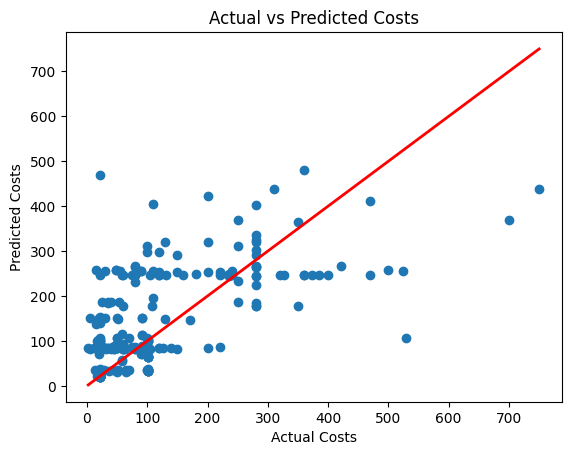

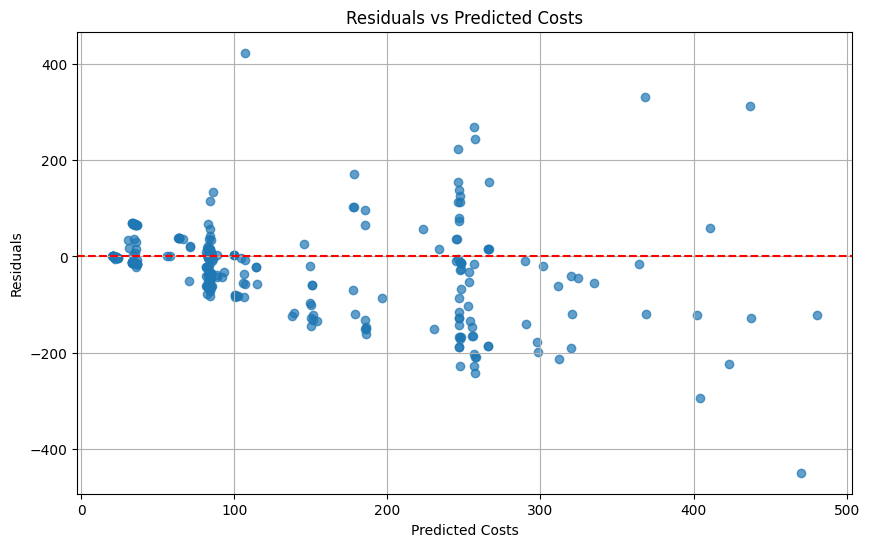

f:\program files (x86)\python37_64\lib\site-packages\sklearn\preprocessing\_encoders.py:174: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


[2.38143920e-03 3.27540398e-03 7.92715542e-03 5.69762365e-02
 2.16433577e-02 3.77398484e-02 2.19845013e-02 5.48810443e-03
 4.45319996e-04 1.14172022e-02 5.69163279e-04 2.52026261e-04
 4.33969443e-02 1.29222927e-03 2.48109783e-04 3.07965434e-03
 2.33823776e-04 1.34487279e-05 4.84205307e-04 2.88153299e-03
 4.43797316e-04 6.65300758e-04 2.11873808e-04 2.02163325e-02
 5.86953805e-03 3.34025246e-01 4.16838204e-01] ['cat__damage type_اصلاح زجاج' 'cat__damage type_اصلاح فرش'
 'cat__damage type_اصلاح كهرباء' 'cat__damage type_اصلاح كوشوك'
 'cat__damage type_اصلاح مكانيك' 'cat__damage type_غيار زيت'
 'cat__location_Other' 'cat__location_ابو خضر' 'cat__location_ابو نعمه'
 'cat__location_الغزاوي' 'cat__location_الغزاوي+معاذ'
 'cat__location_القسطل' 'cat__location_المركزية'
 'cat__location_المركزيه+زكي' 'cat__location_اليادودة'
 'cat__location_امجد العطاري' 'cat__location_جلاسكو' 'cat__location_ريمان'
 'cat__location_زكي البهو' 'cat__location_شارلي'
 'cat__location_في الطفيله' 'cat__location_قسطل'

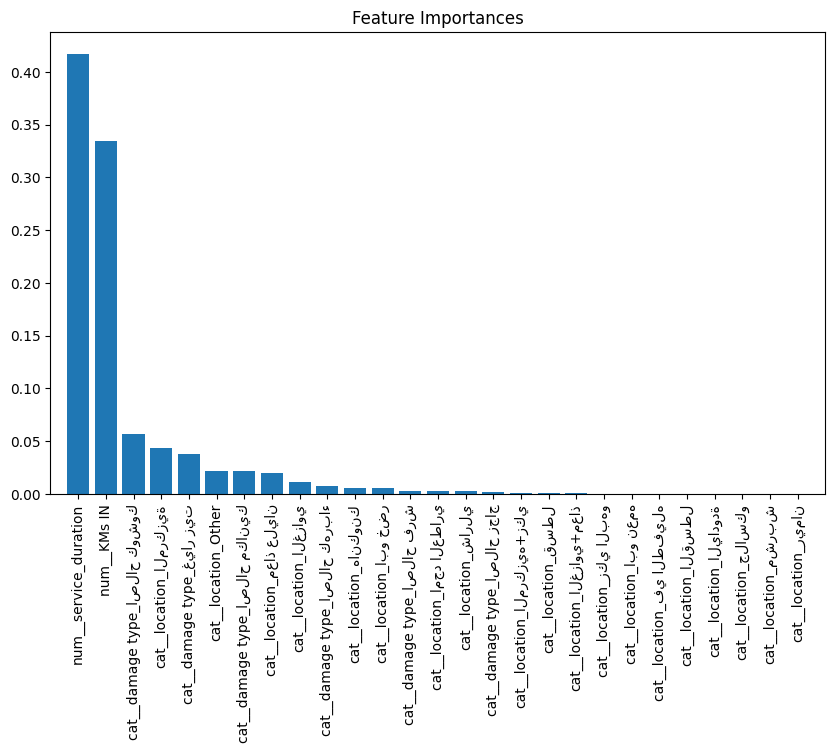

Random Forest Model Results
Mean Squared Error (MSE): 8919.724105231391
Mean Absolute Error (MAE): 58.16142936507936
R² Score: 0.34549652224117655


In [55]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('maintenance_cleaned_extended.xlsx')

# Filter necessary columns based on the suggested features
df = df[['damage type', 'KMs IN', 'service_duration', 'location', 'cost']]

############
# Check unique values in the categorical columns
print("Unique damage types:", df['damage type'].unique())
print("Unique locations:", df['location'].unique())

# Add a check for rare categories
def consolidate_rare_categories(df, column, threshold=5):
    """Consolidate categories that occur less than the threshold into 'Other'."""
    counts = df[column].value_counts()
    rare_categories = counts[counts < threshold].index
    df[column] = df[column].replace(rare_categories, 'Other')
    return df

# Consolidate rare categories before defining features
df = consolidate_rare_categories(df, 'damage type')
df = consolidate_rare_categories(df, 'location')

# Define the feature matrix X and target vector y
X = df[['damage type', 'KMs IN', 'service_duration', 'location']]
y = df['cost']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inspect unique values in training and testing sets for categorical columns
print("Training unique damage types:", X_train['damage type'].unique())
print("Testing unique damage types:", X_test['damage type'].unique())
print("Training unique locations:", X_train['location'].unique())
print("Testing unique locations:", X_test['location'].unique())

# Consolidate categories in both sets
X_train = consolidate_rare_categories(X_train, 'damage type')
X_train = consolidate_rare_categories(X_train, 'location')
X_test = consolidate_rare_categories(X_test, 'damage type')
X_test = consolidate_rare_categories(X_test, 'location')

# Create a preprocessor for one-hot encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), ['damage type', 'location']),
        ('num', 'passthrough', ['KMs IN', 'service_duration'])  # Leave KMs IN and service_duration as-is
    ]
)

# Define a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))  # Initial alpha value
])

# Hyperparameter tuning with GridSearchCV
param_grid = {'model__alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best pipeline from grid search
best_pipeline = grid_search.best_estimator_
best_alpha = grid_search.best_params_['model__alpha']

# Test the model
y_pred = best_pipeline.predict(X_test)

# Calculate final evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the final results
print(f"Final Model Results with Alpha = {best_alpha}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Get coefficients and intercept
final_model = best_pipeline.named_steps['model']
print("Non-zero Coefficients:", sum(final_model.coef_ != 0))
print("Model Coefficients:", final_model.coef_)
print("Intercept:", final_model.intercept_)

# Visualization of predictions vs actual values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # y=x line
plt.xlabel('Actual Costs')
plt.ylabel('Predicted Costs')
plt.title('Actual vs Predicted Costs')
plt.show()

# Additional Visualization: Residual Plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Costs')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Costs')
plt.grid()
plt.show()

# Additional model - Trying a Random Forest Regressor
# Define a pipeline with Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))  # Example with RF
])

# Fit and evaluate Random Forest
rf_pipeline.fit(X_train, y_train)
y_rf_pred = rf_pipeline.predict(X_test)

# Now we visualize feature importances
importances = rf_pipeline.named_steps['model'].feature_importances_
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
indices = np.argsort(importances)[::-1]

print(importances,feature_names)


# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()

# Calculate and print metrics for Random Forest
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print("Random Forest Model Results")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"R² Score: {rf_r2}")



# Save the trained model
with open('final_model.pkl', 'wb') as file:
    pickle.dump(best_pipeline, file)

# Save the one-hot encoded column names for prediction alignment
one_hot_columns = best_pipeline.named_steps['preprocessor'].get_feature_names_out()
with open('one_hot_columns.pkl', 'wb') as file:
    pickle.dump(one_hot_columns, file)






In [63]:
data

,Unnamed: 0,#,plate number,car,damage type,date in,KMs IN,Fuel in,date ready,KMs out,...,monthNIn,dayIn,dayNIn,yearReady,monthReady,monthNReady,dayReady,dayNReady,service_duration,cost_category
0,0,1,70-29280,TUCSAN,اصلاح بودي,2015-01-14,23015,0.13,2015-01-18,23030,...,January,14,Wednesday,2015,1,January,18,Sunday,5,0150:0200
1,1,2,70-26587,ELANTRA,اصلاح بودي,2015-01-14,43638,0.38,2015-01-18,43638,...,January,14,Wednesday,2015,1,January,18,Sunday,5,0200:0300
2,2,3,70-25180,AVANZA,اصلاح مكانيك,2015-01-14,39880,0.38,2015-01-24,39889,...,January,14,Wednesday,2015,1,January,24,Saturday,11,0050:0100
3,3,4,70-26523,FLUENCE,اصلاح بودي,2015-01-14,43705,0.13,2015-01-19,43725,...,January,14,Wednesday,2015,1,January,19,Monday,6,0200:0300
4,4,5,70-30719,FLUENCE,غيار زيت,2015-01-14,25145,0.13,2015-01-19,25160,...,January,14,Wednesday,2015,1,January,19,Monday,6,0200:0300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,1494,1495,70-25213,COROLLA,اصلاح كوشوك,2016-02-02,84166,0.00,2016-02-02,84169,...,February,2,Tuesday,2016,2,February,2,Tuesday,1,0200:0300
1495,1495,1496,70-29981,TUCSAN,غيار زيت,2016-02-02,60122,0.25,2016-02-02,60126,...,February,2,Tuesday,2016,2,February,2,Tuesday,1,0001:0050
1496,1496,1497,70-29538,COROLLA,اصلاح بودي,2016-01-27,68149,0.13,2016-02-03,68154,...,January,27,Wednesday,2016,2,February,3,Wednesday,8,0200:0300
1497,1497,1498,70-35613,CAMRY,اصلاح بودي,2016-01-31,43716,0.25,2016-02-03,43724,...,January,31,Sunday,2016,2,February,3,Wednesday,4,0050:0100


In [64]:
data['damage type'].unique()

array(['اصلاح بودي', 'اصلاح مكانيك', 'غيار زيت', 'اصلاح كوشوك',
       'اصلاح زجاج', 'اصلاح كهرباء', 'اصلاح فرش'], dtype=object)

In [70]:
avg_serviceDuration_damagetype = data.groupby('damage type')['service_duration'].mean().round(0)

In [71]:
avg_serviceDuration_damagetype

damage type
اصلاح بودي      5.0
اصلاح زجاج      1.0
اصلاح فرش       2.0
اصلاح كهرباء    2.0
اصلاح كوشوك     1.0
اصلاح مكانيك    1.0
غيار زيت        1.0
Name: service_duration, dtype: float64